A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 03. 
Analyse the results.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df=pd.read_excel(r"E:\College\SEMESTER 4\MACHINE LEARNING\Lab Session1 Data.xlsx",  sheet_name="Purchase data", usecols = 'B:E')
df
X = df.iloc[:, :-2] 
y = df['Payment (Rs)'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
mape = (mae / y_test.abs()).mean() * 100  
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1847.6133919124932
Root Mean Squared Error (RMSE): 42.98387362619257
Mean Absolute Percentage Error (MAPE): 16.913376251838397%
R^2 Score: 0.628265501350537


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary 
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class 
color. Observe the plot.

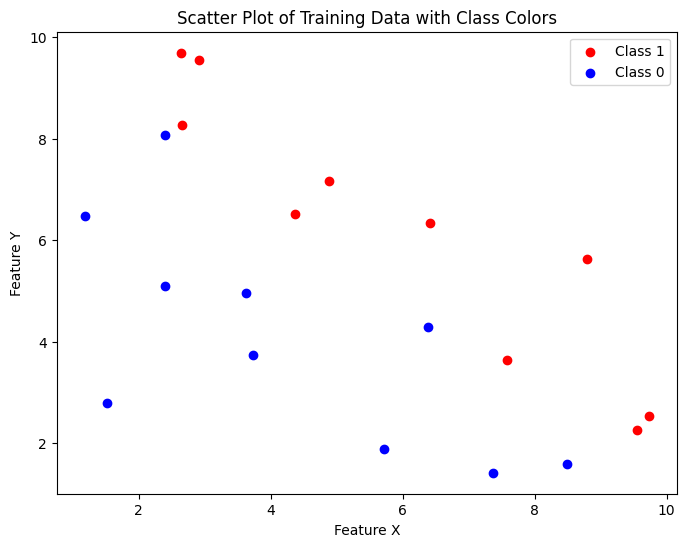

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)  
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
threshold = np.median(X+Y)
classes = np.where(X+Y > threshold, 1, 0)  
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    if classes[i] == 0:
        plt.scatter(X[i], Y[i], color='blue', label='Class 0' if 'Class 0' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(X[i], Y[i], color='red', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.title('Scatter Plot of Training Data with Class Colors')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.show()


A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. 
This creates a test set of about 10,000 points. Classify these points with above training data using 
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their 
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread 
and class boundary lines in the feature space

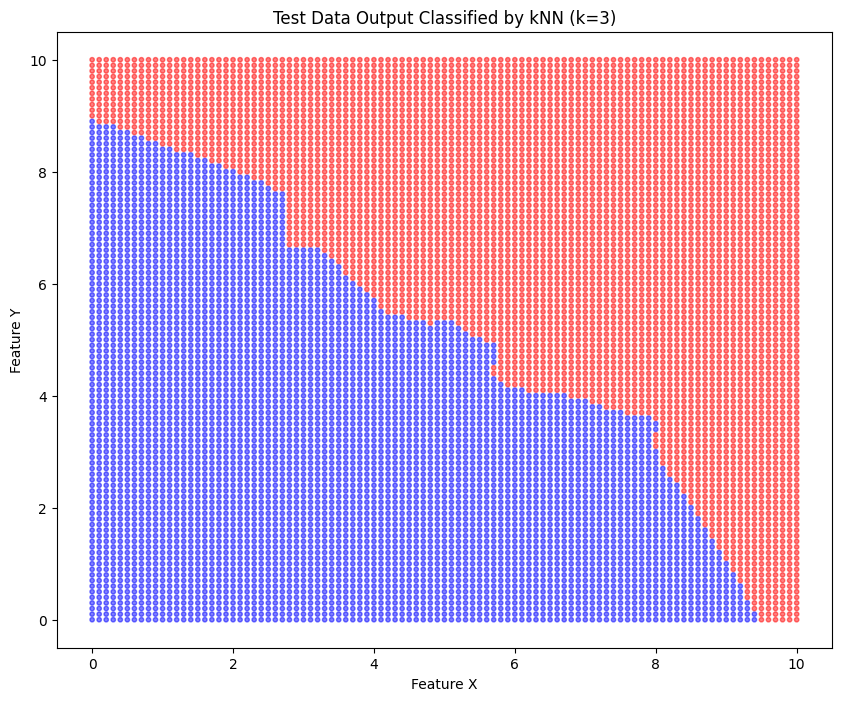

In [5]:
from sklearn.neighbors import KNeighborsClassifier
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_values, y_values)
test_points = np.c_[xx.ravel(), yy.ravel()]
training_data = np.column_stack((X, Y))
training_labels = classes
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_data, training_labels)
predicted_classes = knn.predict(test_points)
plt.figure(figsize=(10, 8))
colors = np.where(predicted_classes==0, 'blue', 'red')  
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors, s=10, alpha=0.5)  
plt.title('Test Data Output Classified by kNN (k=3)')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()


A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.


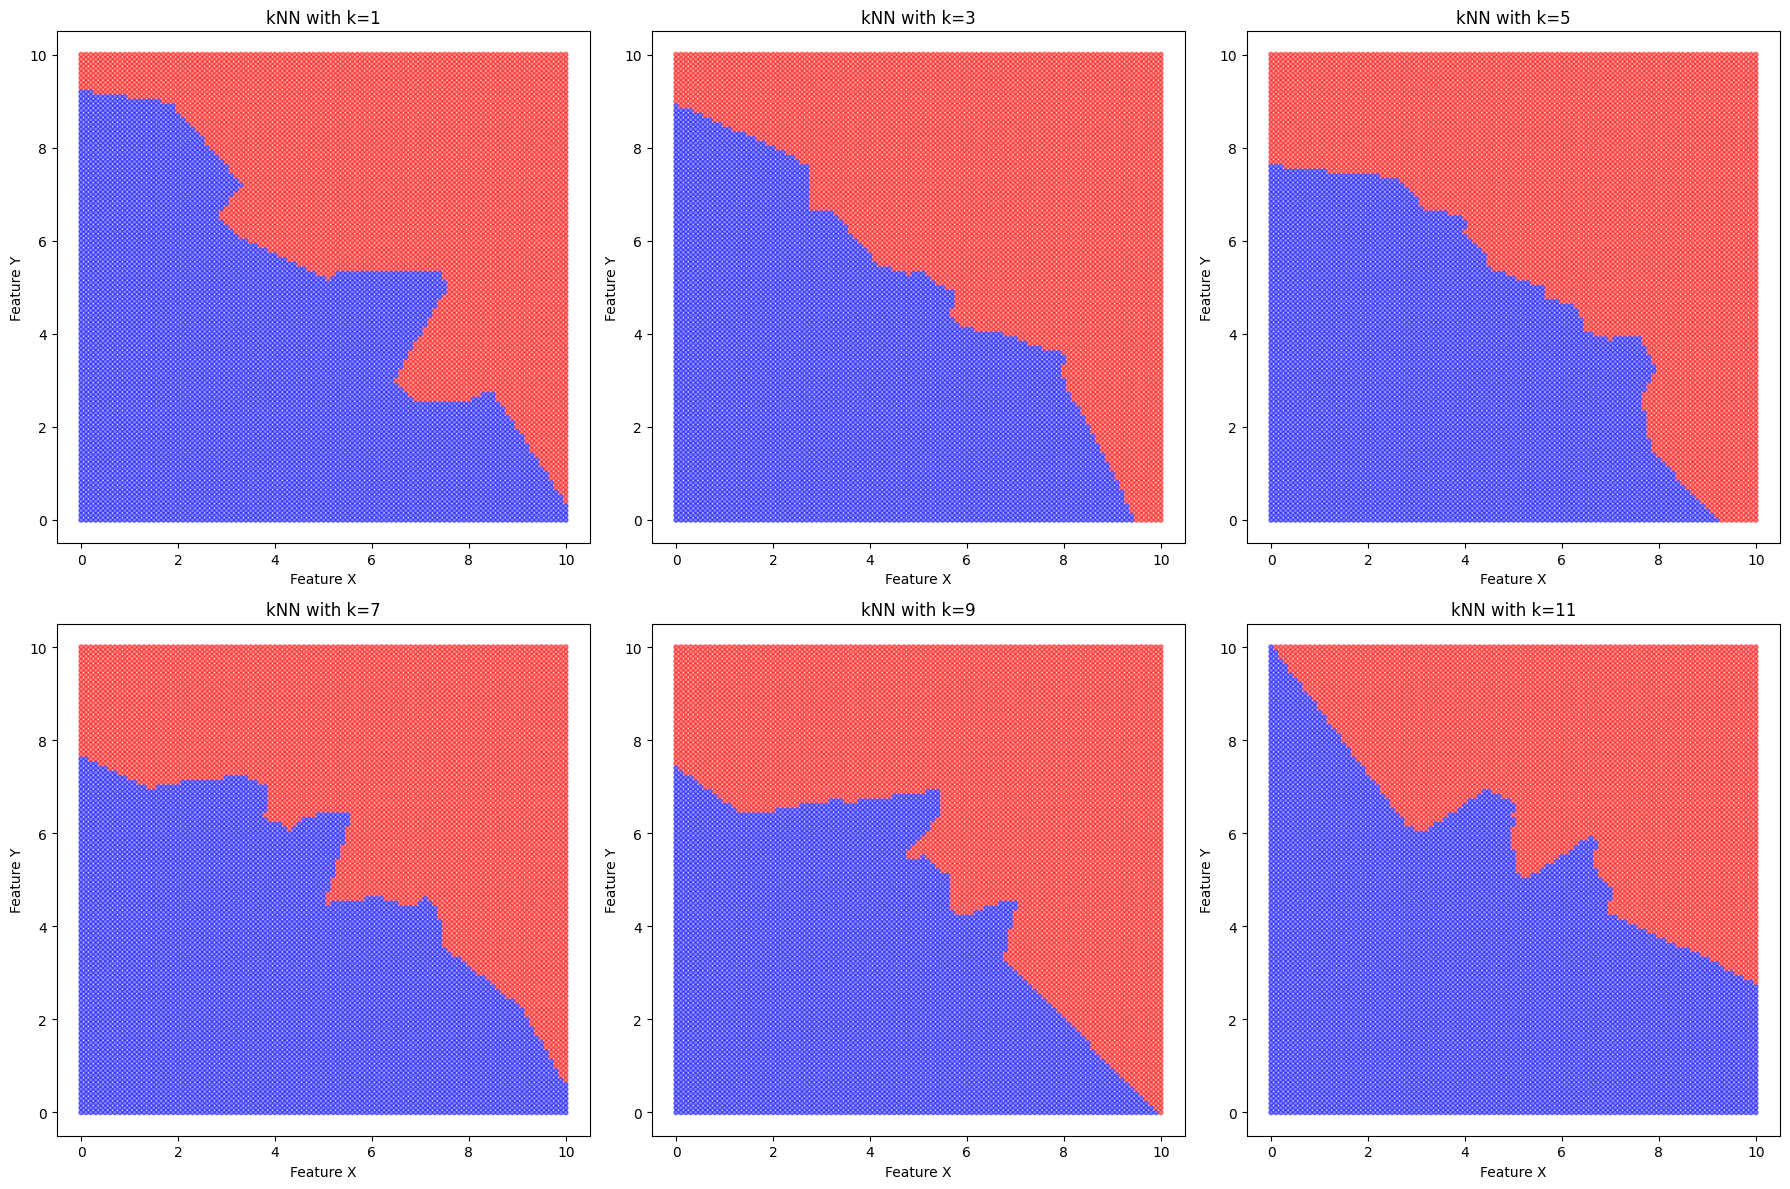

In [6]:
def classify_and_plot_kNN(k_values):
    plt.figure(figsize=(18, 12))
    for i, k in enumerate(k_values, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training_data, training_labels)
        predicted_classes = knn.predict(test_points)
        plt.subplot(2, 3, i)
        colors = np.where(predicted_classes==0, 'blue', 'red') 
        plt.scatter(test_points[:, 0], test_points[:, 1], color=colors, s=10, alpha=0.5)  
        plt.title(f'kNN with k={k}')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
    plt.tight_layout()
    plt.show()
k_values = [1, 3, 5, 7, 9, 11]
classify_and_plot_kNN(k_values)


A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.


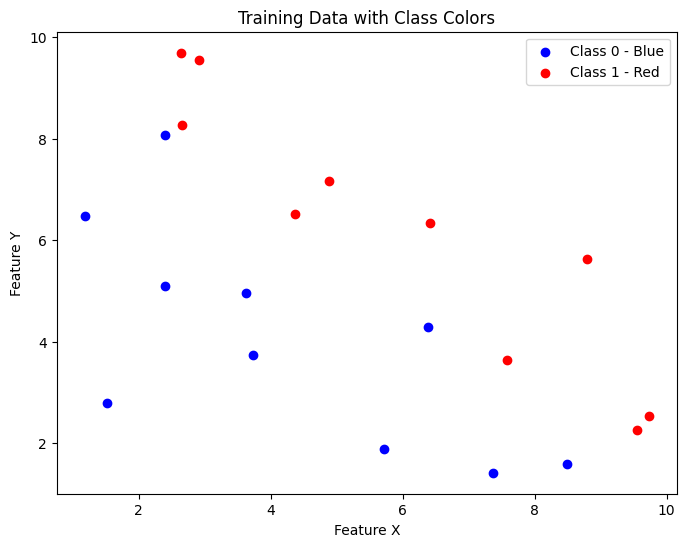

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.uniform(1, 10, size=20)
Y = np.random.uniform(1, 10, size=20)
threshold = np.median(X + Y)
classes = np.where(X + Y > threshold, 1, 0) 
plt.figure(figsize=(8, 6))
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 - Blue')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 - Red')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data with Class Colors')
plt.legend()
plt.show()


A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your 
kNN classifier. This is called hyper-parameter tuning.

In [8]:
from sklearn.model_selection import GridSearchCV
X_train = np.column_stack((X, Y))
y_train = classes
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
best_k = knn_gscv.best_params_['n_neighbors']
best_score = knn_gscv.best_score_
print(f"Best 'k' Value: {best_k}")
print(f"Best Score: {best_score}")


Best 'k' Value: 1
Best Score: 0.8


C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\vinit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skl